<a href="https://colab.research.google.com/github/DCI-alxogm/ML2023/blob/main/Sep8-9/LR_SKLearn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
#Load data
houses=np.loadtxt("/content/drive/MyDrive/DCI_data/ML2023/houses.txt",delimiter=',')
Xh=houses[:,:4]
th=houses[:,4] #Costo de la Casa"
labels=["Tamaño","# habitaciones","pisos","Años"]

In [4]:
Xh.shape

(100, 4)

In [5]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

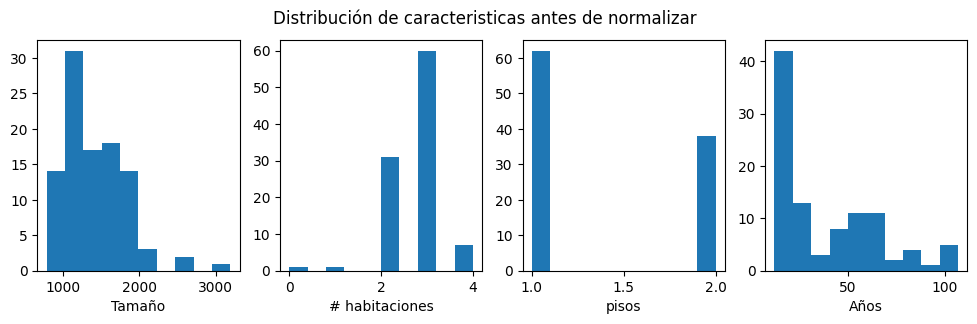

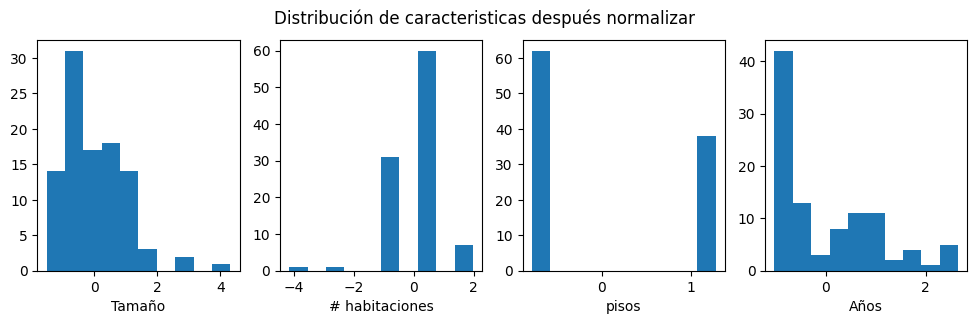

In [6]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

In [7]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 18, number of weight updates: 1801.0


In [8]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [362.37911171], b:[111.78434066 -20.47250613 -31.83618967 -37.6304101 ]


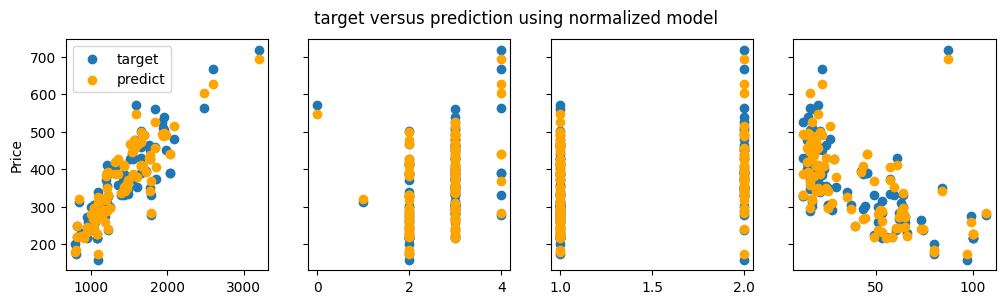

In [9]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [10]:
#USING LIBRARIES

In [11]:
#Split in Train and Test samples.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [13]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 29, number of weight updates: 2031.0


In [14]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [361.49840344], b:[110.38773952 -22.64470419 -34.7497956  -38.76516087]


In [15]:
#Test score
sgdr.score(X_test,y_test)

0.9625035575583462

In [20]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [21]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 412ms/step - loss: 140233.8750
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 134656.0781
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 129306.2578
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 124174.8438
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 119252.7344
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 114531.2031
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 110001.8906
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 105656.8047
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 101488.3125
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 97489.0703
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 93652.0781
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 89970.6250


In [23]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 59.241962 ]
 [  0.5255388]
 [-15.012788 ]
 [-49.68401  ]] [312.57986]


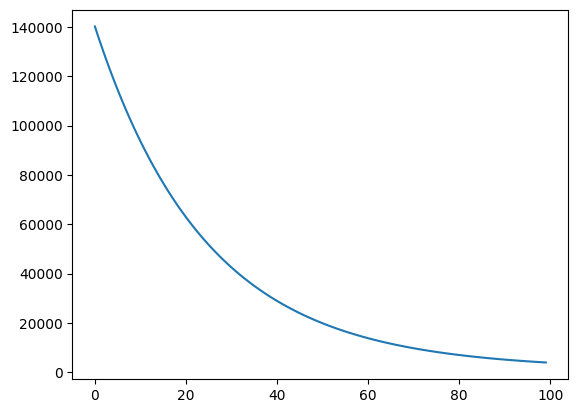

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [27]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 9ms/step - loss: 3794.9941
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 3692.0176
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 3592.7930
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 3497.1707
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 3405.0095
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 3316.1770
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 3230.5442
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 3147.9858
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 3068.3823
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 2991.6182
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 2917.5867
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 2846.1799
Epoch 13/100
1/1 [=====

In [28]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 82.45258 ]
 [ -9.585751]
 [-23.783089]
 [-47.33955 ]] [354.09833]


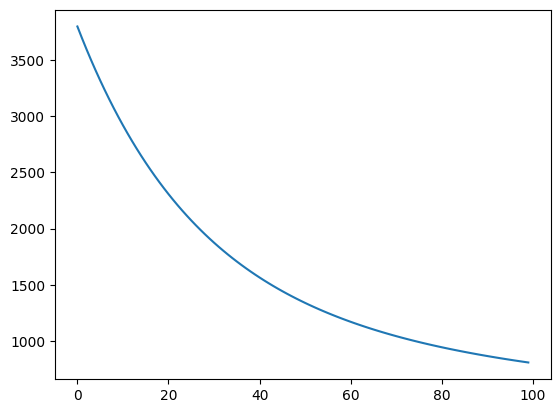

In [29]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
score

523.8893432617188